##Import Liberies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool

##Read Dataset

In [26]:
data = pd.read_csv('Stars.csv' ,header = 0)
df = pd.DataFrame(data)
df.sample(25)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
65,3295,0.000980,0.13200,17.130,Red,M,0
71,3607,0.022000,0.38000,10.120,Red,M,1
103,17120,235000.000000,83.00000,-6.890,Blue,O,4
140,13420,0.000590,0.00981,13.670,Blue,B,2
73,3150,0.008800,0.35000,11.940,Red,M,1
159,37800,202900.000000,6.86000,-4.560,Blue,O,3
38,5936,1.357000,1.10600,4.460,Yellow,F,3
4,1939,0.000138,0.10300,20.060,Red,M,0
148,7723,0.000140,0.00878,14.810,White,A,2
8,2650,0.000690,0.11000,17.450,Red,M,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [28]:
df.shape

(240, 7)

In [29]:
#Number
df_numF = df.select_dtypes(include = "number")
df_numC = df.select_dtypes(include = "number").columns
#Catagorical
df_catF = df.select_dtypes(exclude = "number")
df_catC = df.select_dtypes(exclude = "number").columns

In [14]:
df_catF.sample(10)

,Color,Spectral_Class
184,Red,M
160,Blue,O
57,Red,M
44,Red,M
1,Red,M
59,Red,M
104,Blue,O
83,Blue White,B
86,Blue White,B
150,Blue-white,B


In [13]:
df_numF.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [42]:
df_catF.describe()

,Color,Spectral_Class
count,0,240
unique,0,7
top,NaN,M
freq,NaN,111


In [43]:
df.nunique()

,0
Temperature,228
L,208
R,216
A_M,228
Color,0
Spectral_Class,7
Type,6


##Null Handling
Because we have not got any null data, we can skip this step

In [14]:
df.isnull().sum()

,0
Temperature,0
L,0
R,0
A_M,0
Color,0
Spectral_Class,0
Type,0


##Remove Duplicates

In [37]:
df.duplicated().sum()

0

In [19]:
df.drop_duplicates(inplace = True)

##Outlier Handling

<Axes: >

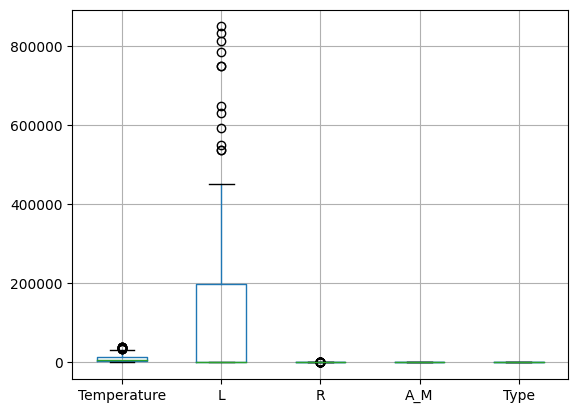

In [22]:
df.boxplot(column = ["Temperature" , "L" , "R" , "A_M" , "Type"])

In [23]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in Temperature: 4.58%
Percentage of outliers in L: 5.00%
Percentage of outliers in R: 16.67%
Percentage of outliers in A_M: 0.00%
Percentage of outliers in Type: 0.00%


In [25]:
def handle_outliers(df):
    for column in df_numF:
        Q1 = df_numF[column].quantile(0.25)
        Q3 = df_numF[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df_numF[column] = df_numF[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df_numF = handle_outliers(df_numF)

In [26]:
calculate_outliers_percentage(df_numF)

Percentage of outliers in Temperature: 0.00%
Percentage of outliers in L: 0.00%
Percentage of outliers in R: 0.00%
Percentage of outliers in A_M: 0.00%
Percentage of outliers in Type: 0.00%


<Axes: >

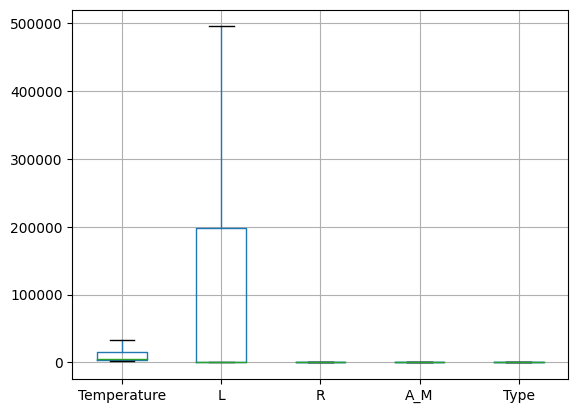

In [28]:
df_numF.boxplot(column = ["Temperature" , "L" , "R" , "A_M" , "Type"])

##Visualization

###BarChart

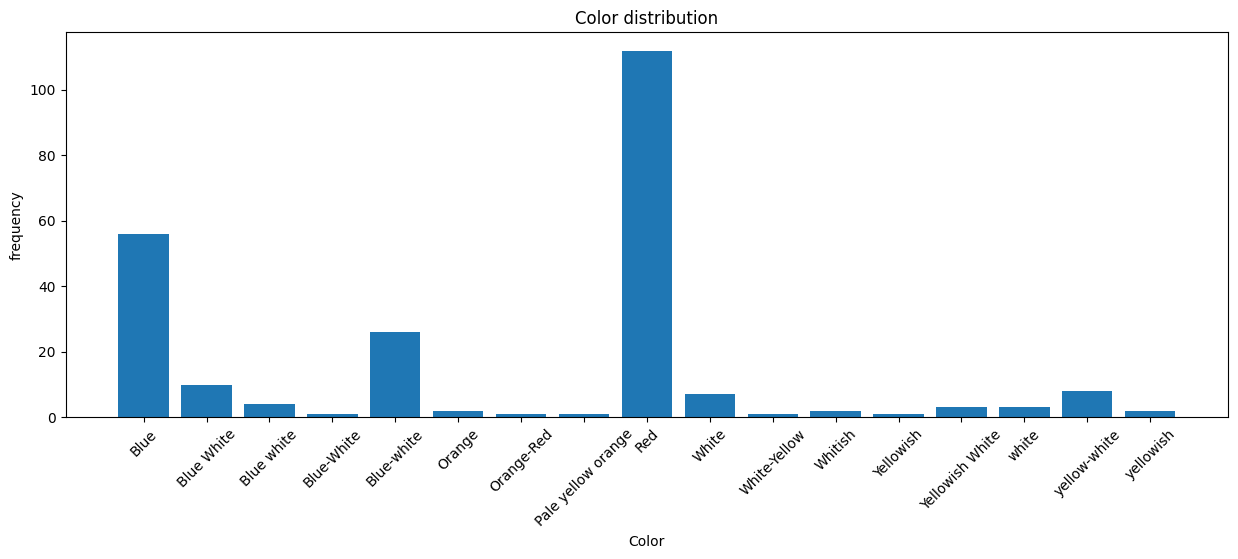

In [33]:
## age dist. bar chart
Color_count = df['Color'].value_counts().sort_index()
plt.figure(figsize=(15, 5))
plt.bar(Color_count.index, Color_count.values)
#age_count.plot(kind='barh', figsize=(15, 5), grid=True)
plt.title("Color distribution")
plt.xlabel("Color")
plt.xticks(rotation = 45)
plt.ylabel("frequency")
plt.show()


We can understand the same data row so
Lets do it

###Filter

In [24]:
import pandas as pd

# Assuming df is your DataFrame
colors = {
        "Blue White": "Blue",
        "Blue white": "Blue",
        "Blue-White": "Blue",
        "Blue-white": "Blue",
        "Orange-Red": "Orange",
        "Pale yellow orange": "Orange",
        "Whitish": "White",
        "white": "White",
        "White-Yellow": "Yellow",
        "Yellowish": "Yellow",
        "Yellowish White": "Yellow",
        "yellow-white": "Yellow",
        "yellowish": "Yellow"
    }
df = df.replace(colors)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


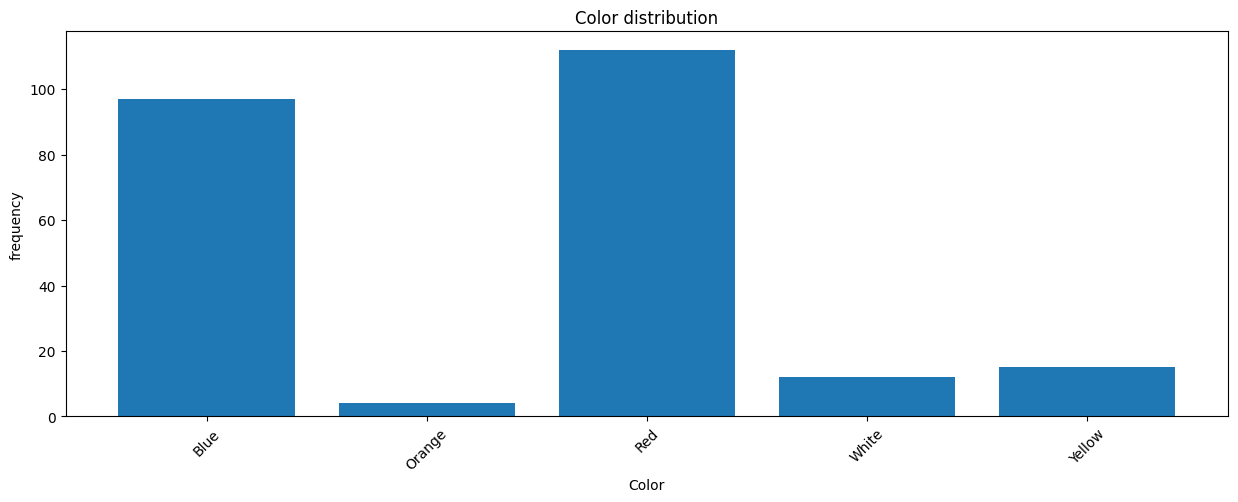

In [30]:
## age dist. bar chart
Color_count = df['Color'].value_counts().sort_index()
plt.figure(figsize=(15, 5))
plt.bar(Color_count.index, Color_count.values)
#age_count.plot(kind='barh', figsize=(15, 5), grid=True)
plt.title("Color distribution")
plt.xlabel("Color")
plt.xticks(rotation = 45)
plt.ylabel("frequency")
plt.show()


##PieChart

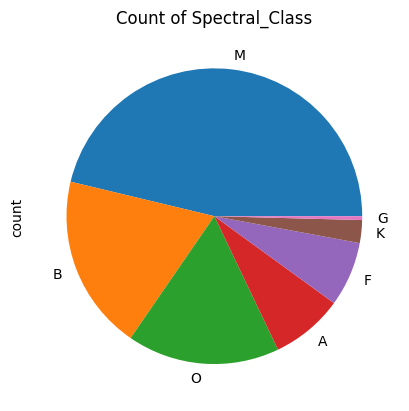

In [32]:
## pie chart
df["Spectral_Class"].value_counts().plot(kind='pie')
plt.title("Count of Spectral_Class")
plt.show()

##BarChart

In [36]:
fig = px.bar(df.Temperature, x=df.Temperature.index, y=df.Temperature.values)
fig.update_layout(title="Temp", xaxis_title="temperature", yaxis_title="frequency")
fig.update_traces(
    hoverinfo='all',
    hovertemplate='<b>temperature: </b>%{x} <br><i>frequency: </i>%{y}'
)
fig.show()


###Histogram

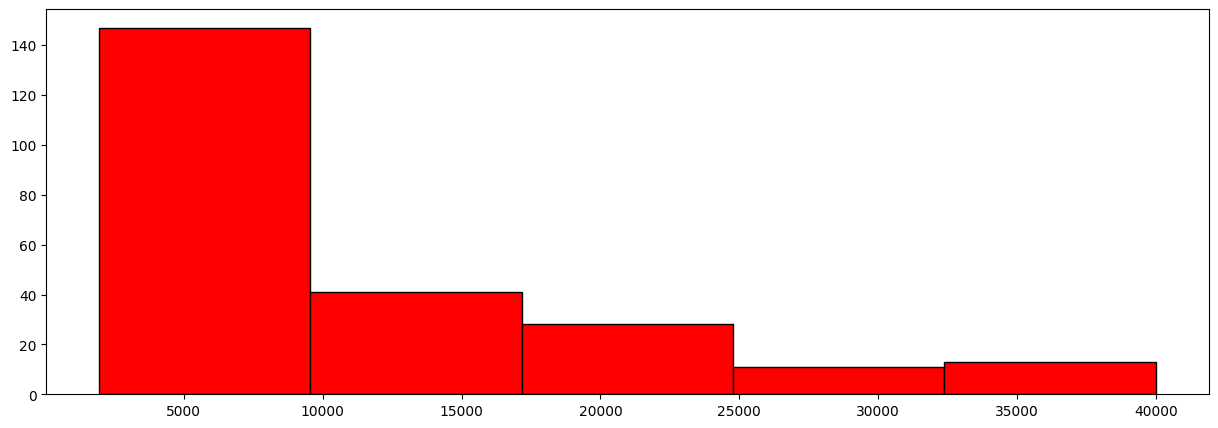

In [43]:
## Hist.
plt.figure(figsize=(15, 5))

plt.hist(df['Temperature'], bins=5, edgecolor='black' , color= "r")

plt.show()